In [3]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
# 1. Load Data
# ------------------------------------------------------------------------------
print("Fetching MNIST data... (this might take a moment)")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target

# Scale data to range [0, 1] and convert labels to integers
X = X / 255.0
y = y.astype(int)

# Split into Train/Test (Using first 60,000 for training)
X_train, X_test = X[:60000].T, X[60000:].T
Y_train, Y_test = y[:60000], y[60000:]

print(f"Training Data Shape: {X_train.shape}") # Should be (784, 60000)
print(f"Training Labels Shape: {Y_train.shape}")

Fetching MNIST data... (this might take a moment)
Training Data Shape: (784, 60000)
Training Labels Shape: (60000,)


In [4]:
# 2. Helper Functions (Activations)
# ------------------------------------------------------------------------------
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    # Subtract max for numerical stability to prevent overflow
    exp = np.exp(Z - np.max(Z, axis=0))
    return exp / np.sum(exp, axis=0)

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

In [5]:
# 3. Neural Network Functions
# ------------------------------------------------------------------------------
def init_params():
    # Initialize weights and biases with random values
    # W1: (10, 784), b1: (10, 1), W2: (10, 10), b2: (10, 1)
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    # Layer 1
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    # Layer 2
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)

    # Layer 2 Gradients
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    # Layer 1 Gradients
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [6]:
# 4. Training Loop
# ------------------------------------------------------------------------------
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            print(f"Iteration: {i}")
            predictions = get_predictions(A2)
            print(f"Accuracy: {get_accuracy(predictions, Y):.4f}")

    return W1, b1, W2, b2

# Run Training
print("\nStarting Gradient Descent...")
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Starting Gradient Descent...
Iteration: 0
Accuracy: 0.0816
Iteration: 50
Accuracy: 0.2184
Iteration: 100
Accuracy: 0.3218
Iteration: 150
Accuracy: 0.4862
Iteration: 200
Accuracy: 0.5997
Iteration: 250
Accuracy: 0.6815
Iteration: 300
Accuracy: 0.7347
Iteration: 350
Accuracy: 0.7671
Iteration: 400
Accuracy: 0.7900
Iteration: 450
Accuracy: 0.8059


Prediction:  [3]
Label:  5


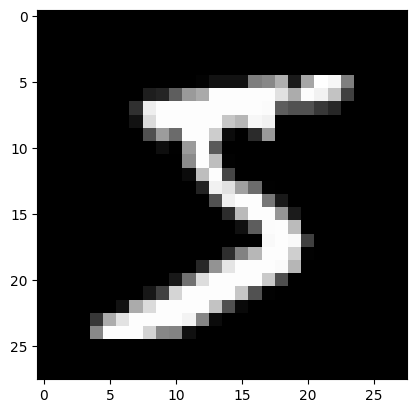

Prediction:  [3]
Label:  3


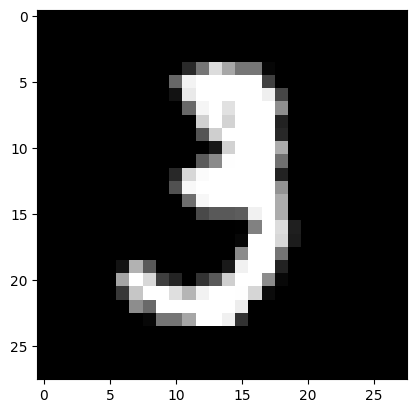

In [7]:
# 5. Testing and Visualization
# ------------------------------------------------------------------------------
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Test on a random image
test_prediction(0, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)